In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from bs4 import BeautifulSoup  # Import BeautifulSoup
import numpy as np  # Import numpy for NaN handling
from flask import Flask, render_template
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
# Load the dataset
df = pd.read_csv("Emails dataset.csv")

In [3]:
# Remove the unnamed index column
df = df.drop(df.columns[0], axis=1)

In [4]:
# Explore the data
print(df.head())
print(df.info())
print(df['Spam/Ham'].value_counts()) # Check the distribution of spam and ham

                        Subject  \
0  christmas tree farm pictures   
1      vastar resources , inc .   
2  calpine daily gas nomination   
3                    re : issue   
4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Subject   33716 non-null  object
 1   Message   33664 non-null  object
 2   Spam/Ham  33716 non-null  object
 3   Date      33716 non-null  obje

In [5]:
# Convert text to lowercase
df['Message'] = df['Message'].str.lower()
df['Subject'] = df['Subject'].str.lower()

In [6]:
def remove_html(text):
    if isinstance(text, str):
        soup = BeautifulSoup(text, 'html.parser')
        return soup.get_text()
    return text

def remove_punctuation(text):
    if isinstance(text, str):
        PUNCT_TO_REMOVE = string.punctuation
        return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    return text

def remove_stopwords(text):
    if isinstance(text, str):
        STOPWORDS = set(stopwords.words('english'))
        return " ".join([word for word in str(text).split() if word not in STOPWORDS])
    return text

df['Message'] = df['Message'].apply(remove_html)
df['Subject'] = df['Subject'].apply(remove_html)

df['Message'] = df['Message'].apply(remove_punctuation)
df['Subject'] = df['Subject'].apply(remove_punctuation)

df['Message'] = df['Message'].apply(remove_stopwords)
df['Subject'] = df['Subject'].apply(remove_stopwords)

# Handling Missing Values (NaNs) - Corrected:
df['Message'] = df['Message'].replace('', np.nan)  # Correct way to replace
df['Subject'] = df['Subject'].replace('', np.nan)  # Correct way to replace

df.dropna(subset=['Message', 'Subject'], inplace=True)  # Drop rows with NaN

In [7]:
# Combine Subject and Message for feature extraction
df['Combined'] = df['Subject'] + ' ' + df['Message']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Combined'])
y = df['Spam/Ham'] # Target variable

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9876193317422435
              precision    recall  f1-score   support

         ham       1.00      0.97      0.99      3304
        spam       0.98      1.00      0.99      3400

    accuracy                           0.99      6704
   macro avg       0.99      0.99      0.99      6704
weighted avg       0.99      0.99      0.99      6704



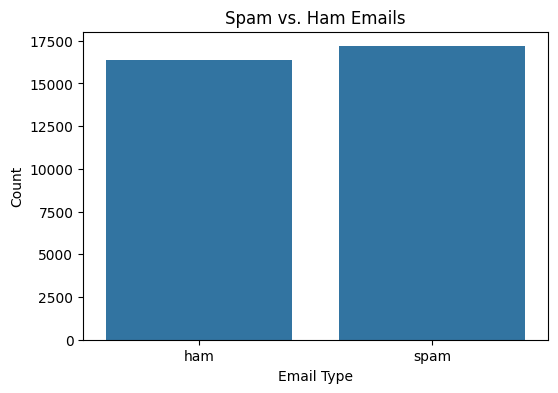

In [9]:
# 1. Spam vs. Ham Emails (Count Plot)
plt.figure(figsize=(6, 4))
sns.countplot(x='Spam/Ham', data=df)
plt.title('Spam vs. Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.savefig("spam_vs_ham.png")
plt.show()

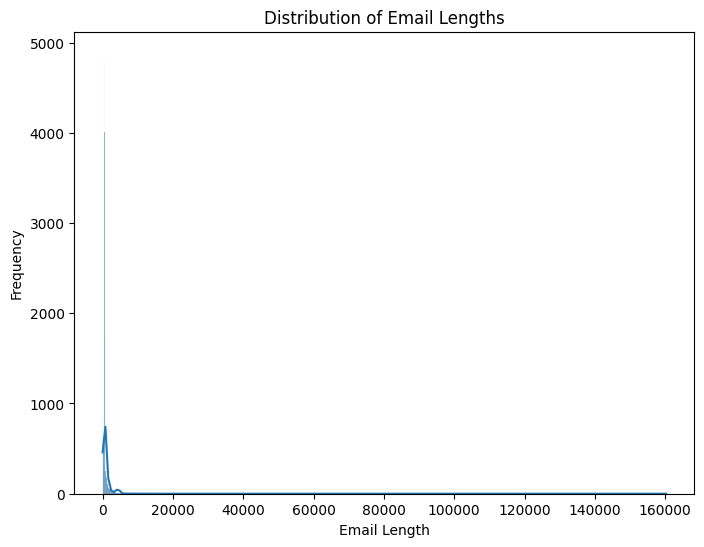

In [10]:
# 2. Distribution of Email Lengths
df['message_length'] = df['Message'].str.len() #Use df instead of email_df
plt.figure(figsize=(8, 6))
sns.histplot(df['message_length'], kde=True) #Use df instead of email_df
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.savefig("email_length_distribution.png")
plt.show()

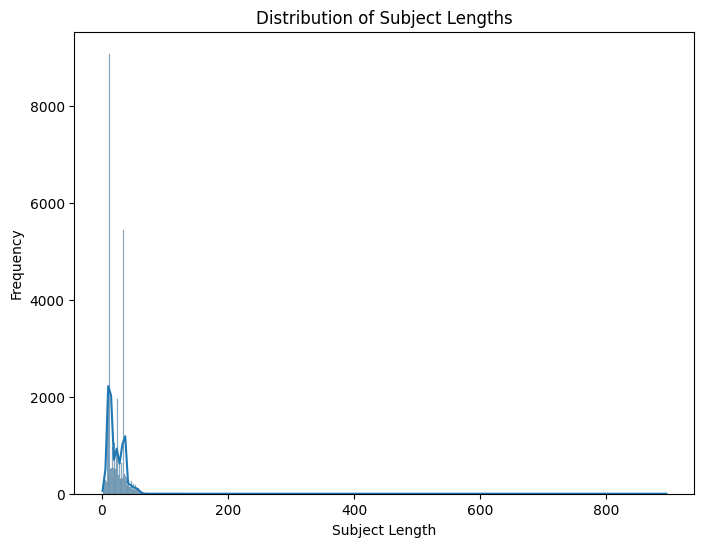

In [11]:
# 3. Subject Length Distribution
df['subject_length'] = df['Subject'].str.len() #Use df instead of email_df
plt.figure(figsize=(8, 6))
sns.histplot(df['subject_length'], kde=True) #Use df instead of email_df
plt.title('Distribution of Subject Lengths')
plt.xlabel('Subject Length')
plt.ylabel('Frequency')
plt.savefig("subject_length_distribution.png")
plt.show()


In [12]:
# Combine Subject and Message for feature extraction
df['Combined'] = df['Subject'] + ' ' + df['Message']

vectorizer = TfidfVectorizer()  # Initialize the vectorizer *before* fitting
X = vectorizer.fit_transform(df['Combined'])
y = df['Spam/Ham']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [13]:
# --- Save the trained model ---
with open('email_spam_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# --- Save the vectorizer ---
with open('email_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Email model and vectorizer saved!")

Email model and vectorizer saved!
